In [1]:
# Källkoden till deluppgift 1 skriver du här:

import csv          #importera modulen CSV

#funktionsdefinition
def read_file(file_name):
    befolkning = []     #skapa tom lista befolkning
    with open(file_name,'r') as csv_file:        #skapa filobjekt
        csv_reader = csv.reader(csv_file, delimiter=';')  #läs in file med åtskiljnadstecken ';'

        for rad in csv_reader:
            befolkning.append(rad)      #lägg till varje rad från file_name till befolkning
    return befolkning                   #returnera lista

#huvudprogram
befolkning = read_file('befolkningsdata.csv')
for k in range(0, 2):     #skriv ut de två första raderna
    print(befolkning[k], '\n')

['COUNTRIES', '2019', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'] 

['Belgium', '11455519', '11507338', '11661206', '11757990', '11835820', '11894881', '11927324', '11926987', '11900354', '11865788', '11841493', '11833541', '11835088', '11836508', '11835842', '11836801', '11843931', '11854389'] 



In [2]:
# Källkoden till deluppgift 2 skriver du här:
# kolumn 0: land
# kolumn 1: lägsta förväntade befolkningstalet under tidsperioden 2019-2100.
# kolumn 2: årtalet för lägsta förväntade befolkningstalet.
# kolumn 3: högsta förväntade befolkningstalet under tidsperioden 2019-2100.
# kolumn 4: årtalet för högsta förväntade befolkningstalet.
# kolumn 5: förväntad befolkningsutveckling uttryckt i % under tidsperioden 2019-2100
# och ska beräknas enligt formeln: (befolkning_2100 – befolkning_2019)/befolkning_2019 * 100.

# Pythons inbyggda funktioner min() och max() får på denna deluppgift inte användas

# funktion som implementerar bubble sort på en 1-dimensionell lista
def bubble_sort(lista):
    n = len(lista)
    for i in range(n):
        # sätt flagga för terminering av sortering
        sortering_klar = True
        #börja sortering
        for j in range(n - i - 1):
            # om större värde, byt plats
            if lista[j] > lista[j + 1]:
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
                #eftersom två värden bytte plats så är sorteringen inte klar
                sortering_klar = False
        # inga platsbyten ger att sorteringen är klar
        if sortering_klar:
            break
    return lista

def analysera_data(lista):
    analyserad_data = [] # behållare för analyserad data
    befolkning_2100_index = befolkning[0].index('2100') #index för kolumn där året är 2100
    befolkning_2019_index = befolkning[0].index('2019') #index för kolumn där året är 2019
    # loopa rader, hitta max och index för max. append rad med data till analyserad_data
    for land in range (1, len(befolkning)):
        # skapa array där befolkningstalen för land ingår
        for i in range(len(befolkning[land])):
            befolkningstal_land = befolkning[land][1:]

        befolkningstal_land = bubble_sort(befolkningstal_land) # sortera befolkningstal från minsta till största
        min_value = befolkningstal_land[0] # minsta befolkningstalet
        min_value_index = befolkning[land].index(min_value)  # hitta index för minsta befolkningstalet
        min_value_year = befolkning[0][min_value_index] # hitta året för minsta befolkningstalet
        
        max_value = befolkningstal_land[len(befolkningstal_land) - 1] # största befolkningstalet
        max_value_index = befolkning[land].index(max_value)  # hitta index för största befolkningstalet
        max_value_year = befolkning[0][max_value_index] # hitta året för största befolkningstalet
                 
        befolkning_2100 = int(befolkning[land][befolkning_2100_index]) # befolkning för land år 2100 som heltal
        befolkning_2019 = int(befolkning[land][befolkning_2019_index]) # befolkning för land år 2019 som heltal
        # procentuell befolkningsökning avrundat till en decimal
        befolkningsutveckling_2100_2019 = round((befolkning_2100 - befolkning_2019)/befolkning_2019 * 100, 1)
        
        variabel_lista = [min_value, min_value_year, max_value, max_value_year, befolkningsutveckling_2100_2019]

        rad = [] # behållare för data som skall adderas till analyserad_data
        rad.append(befolkning[land][0]) # lägg till landsnamnet
        for i in range(len(variabel_lista)): # lägg till värdena från variabel_lista till rad[]
            rad.append(variabel_lista[i]) 
        
        analyserad_data.append(rad)
    return analyserad_data;

analyserad_data = analysera_data(befolkning)
for k in range(0, 2):     #skriv ut de två första raderna
    print(analyserad_data[k], '\n')

['Belgium', '11455519', '2019', '11927324', '2045', 3.5] 

['Bulgaria', '4737768', '2100', '7000039', '2019', -32.3] 



In [3]:
# Källkoden till deluppgift 3 skriver du här:
# skriv ett program som skapar en tabell innehållande de fem länder i listan befolkning
# där befolkningen ökar mest och de fem länder där befolkningen minskar mest.

# hitta de fem högsta och de fem lägsta värdena på befolkningsutvecklingen

### Pythons inbyggda funktioner sort() eller sorted() får på denna deluppgift inte användas ###

# sortera på sjätte kolumnen (procentuell förändring av befolkningstalen)
# skapa array där de procentuella förändringarna ingår
befolkningsförändring_procent = []
for i in range(len(analyserad_data)):
    befolkningsförändring_procent.append(analyserad_data[i][5])

# sortera befolkningsförändring_procent från minsta till största
befolkningsförändring_procent = bubble_sort(befolkningsförändring_procent)

# skapa indexlista där de fem största och fem minsta befolkningsförändringarna ingår (största till minsta)
# först de fem största
indexlista = []
for i in range(len(befolkningsförändring_procent) - 1, len(befolkningsförändring_procent) - 6, - 1):
    for j in range(len(analyserad_data)):
        if(befolkningsförändring_procent[i] == analyserad_data[j][5]):
            indexlista.append(j)
# de fem minsta            
for i in range(5, 0, - 1):
    for j in range(len(analyserad_data)):
        if(befolkningsförändring_procent[i - 1] == analyserad_data[j][5]):
            indexlista.append(j)

# här börjar utskriften av tabellen
print('==============================================================================================\n')
print('\n')
print('Förväntad befolkningsutveckling för tio länder inom EU under åren 2019 -- 2100\n')
print('(Tabellen visar de fem länder med störst respektive minst förväntad befolkningsökning)\n')
print('-----------------------------------------------------------------------------------------------\n')
print(f'{"":<35s}{"Estimerad befolkning":<25s}\n')
print(f'{"":<35s}--------------------\n')
print(f'{"Land":<25s} {"Lägst befolkningsantal":>28s} {"Högst befolkningsantal":>28s} {"Förändring (%)":>15s}\n')
print(f'{"":<25s} {"Befolkning":>17s} {"År":>8s} {"Befolkning":>20s} {"År":>8s} {"2019-2100":>15s}\n')
# skriv ut fem första länderna ur listan
for i in range(0, 10):
    print(f'{analyserad_data[indexlista[i]][0]:<25s}{analyserad_data[indexlista[i]][1]:>18s}{analyserad_data[indexlista[i]][2]:>10s}{analyserad_data[indexlista[i]][3]:>20s}{analyserad_data[indexlista[i]][4]:>10s}{str(analyserad_data[indexlista[i]][5]):>15s}\n')
# skriv ut fem sista länderna ur listan
# for i in range(len(analyserad_data) - 5, len(analyserad_data)):
#    print(f'{analyserad_data[indexlista[i]][0]:<25s}{analyserad_data[indexlista[i]][1]:>18s}{analyserad_data[indexlista[i]][2]:>10s}{analyserad_data[indexlista[i]][3]:>20s}{analyserad_data[indexlista[i]][4]:>10s}{str(analyserad_data[indexlista[i]][5]):>15s}\n')
print('==================================================================================================')




Förväntad befolkningsutveckling för tio länder inom EU under åren 2019 -- 2100

(Tabellen visar de fem länder med störst respektive minst förväntad befolkningsökning)

-----------------------------------------------------------------------------------------------

                                   Estimerad befolkning     

                                   --------------------

Land                            Lägst befolkningsantal       Högst befolkningsantal  Förändring (%)

                                 Befolkning       År           Befolkning       År       2019-2100

Malta                                493559      2019              707996      2075           39.7

Ireland                             4904240      2019             6610753      2100           34.8

Sweden                             10230185      2019            13659849      2100           33.5

Cyprus                              1012858      2040              990814      2035           27.7

Luxembourg  

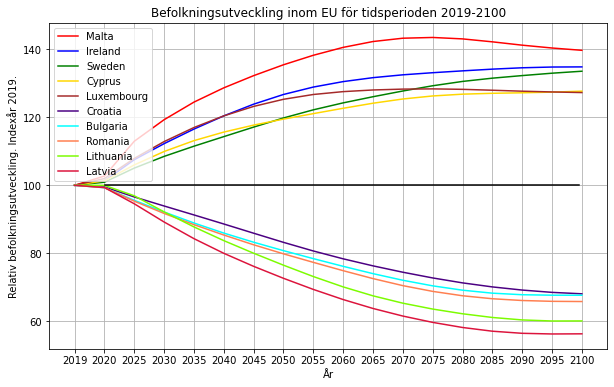

In [4]:
# Källkoden till deluppgift 4 skriver du här:
# Använd de tio länderna från uppg.3.
# print(befolkning)

# Hittad de tio länderna från uppg.3.
# Hämta data ur befolkning
# skapa lista med listor med landsnamn och utveckling (kopiera från befolkning)
import matplotlib.pyplot as plt

# sortera på sjätte kolumnen.
# Först skifta datan på varje rad ett steg åt höger
for i in range(len(analyserad_data)):
    analyserad_data[i] = analyserad_data[i][len(analyserad_data[0])-1:] + analyserad_data[i][:len(analyserad_data[0])-1]
    
analyserad_data.sort(reverse = True)

# skifta datan på varje rad ett steg åt vänster. analyserad_data är nu sorterad på befolkningsutvecklingen
for i in range(len(analyserad_data)):
    analyserad_data[i] = analyserad_data[i][1:len(analyserad_data[0])] + analyserad_data[i][0:1]

# ur analyserad data fås de fem första och de fem sista ländernas namn
länder = [] # tom lista för att spara länderna från analyserad_data
for i in range(0, 5):
    länder.append(analyserad_data[i][0])
for i in range(len(analyserad_data) - 5, len(analyserad_data)):
    länder.append(analyserad_data[i][0])

# behållare för befolkningstalen för varje land i länder (i samma ordning)
y_koord = []
befolkningstal = []
# fyll på kurva genom att hitta länder i befolkning och kopiera befolkningstalen
for land in länder:
    for j in range(len(befolkning)):
        if(land == befolkning[j][0]):
            for k in range(len(befolkning[0]) - 1):
                befolkningstal.append(befolkning[j][k + 1])
            befolkningstal_kopia = befolkningstal[:]
            y_koord.append(befolkningstal_kopia)
            befolkningstal.clear()

# normera kurva till 100 för år 2019
for i in range(len(y_koord)):
    for j in range(len(y_koord[0]) -1, -1, -1):
        y_koord[i][j] = int(y_koord[i][j])/int(y_koord[i][0]) * 100


# innehåller årtalen från befolkning
x_koord = []
for k in range(len(befolkning[0]) - 1):
    x_koord.append(befolkning[0][k + 1])

# innehåller färgerna för kurvorna
färger = ["red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson"]

# diagramstorlek
plt.figure(figsize = (10, 6))

# rita kurvorna
for i in range(len(länder)):
    plt.plot(x_koord, y_koord[i], color = färger[i], label = länder[i])

# normvärdet 100 indikeras med en svart horisontell linje
plt.axhline(y = 100, xmin = 0.1, xmax = 0.95, color = 'black')
# etiketter, diagramrubrik och axeltitlar
plt.legend(loc = 2)
plt.grid()
plt.title('Befolkningsutveckling inom EU för tidsperioden 2019-2100')
plt.xlabel('År')
plt.ylabel('Relativ befolkningsutveckling. Indexår 2019.')

plt.show()

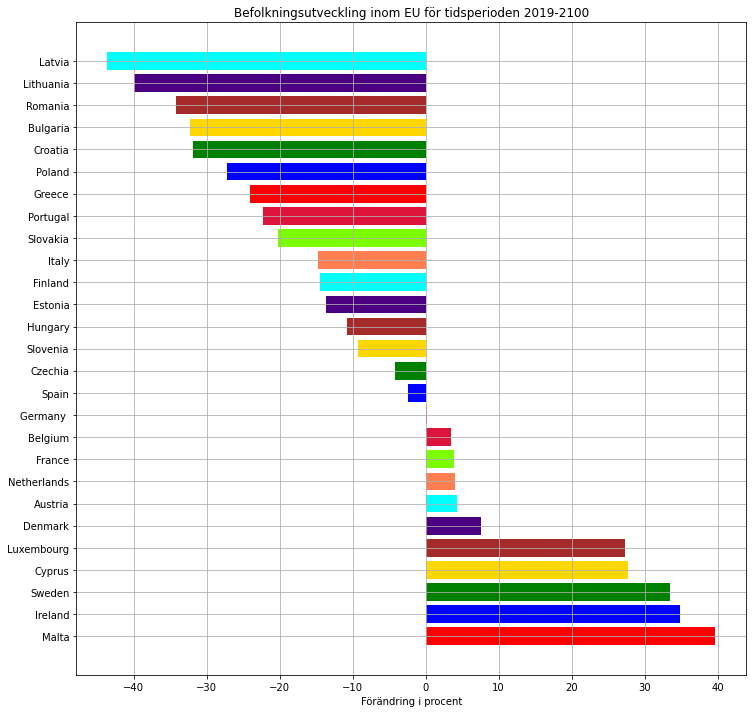

In [5]:
# Källkoden till deluppgift 5 skriver du här:

# Skapa ett horisontellt stapeldiagram innehållande samtliga länders befolkningsutveckling
# under tidsperioden 2019-2100 (dvs innehållet i kolumn 6 i uppgift 2).

y = [] # landsnamn
for i in range(len(analyserad_data)):
    y.append(analyserad_data[i][0])

x = [] # procentuell förändring
for i in range(len(analyserad_data)):
    x.append(analyserad_data[i][5])

# 27 färger i en lista
färger = ["red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson", "red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson", "red", "blue", "green", "gold", "brown", "indigo", "cyan"]
    
# diagramstorlek
plt.figure(figsize = (12, 12))

plt.barh(y, x, height=0.8, color = färger)
plt.grid()
plt.title('Befolkningsutveckling inom EU för tidsperioden 2019-2100')
plt.xlabel('Förändring i procent')
plt.locator_params(axis="x", nbins=10)
plt.show()

1. Hämta data från fil
2. Analysera data
3. Avsluta


Välj menyalternativ (1-3):1
Vill du läsa in befolkningsdata.csv? Ja = 1, Nej = 01
1. Hämta data från fil
2. Analysera data
3. Avsluta


Välj menyalternativ (1-3):1
Vill du läsa in befolkningsdata.csv? Ja = 1, Nej = 01
1. Hämta data från fil
2. Analysera data
3. Avsluta


Välj menyalternativ (1-3):2



Förväntad befolkningsutveckling för tio länder inom EU under åren 2019 -- 2100

(Tabellen visar de fem länder med störst respektive minst förväntad befolkningsökning)

-----------------------------------------------------------------------------------------------

                                   Estimerad befolkning     

                                   --------------------

Land                            Lägst befolkningsantal       Högst befolkningsantal  Förändring (%)

                                 Befolkning       År           Befolkning       År       2019-2100

Malta                                493559      2019     

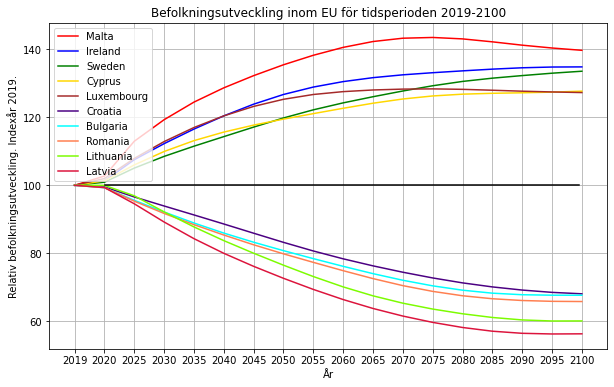

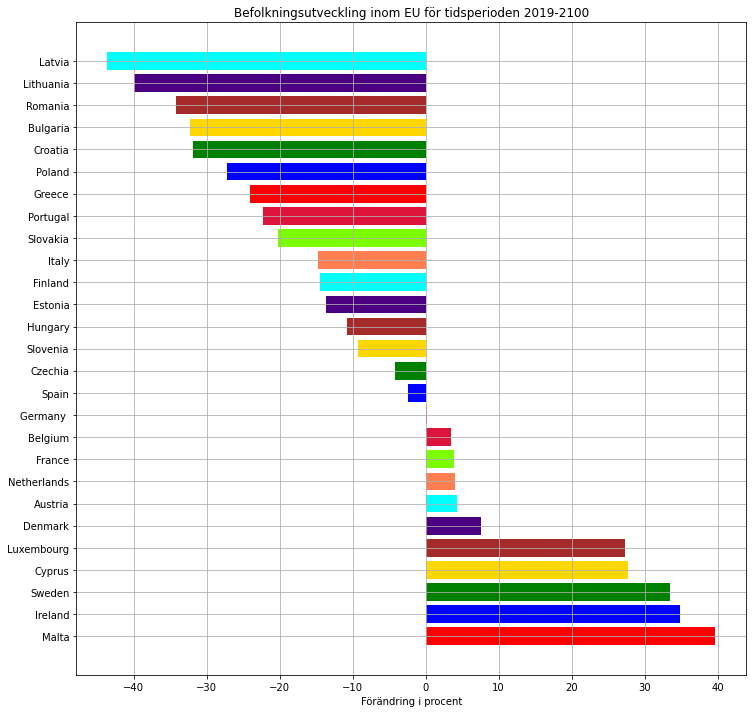

1. Hämta data från fil
2. Analysera data
3. Avsluta


Välj menyalternativ (1-3):34
1. Hämta data från fil
2. Analysera data
3. Avsluta


Välj menyalternativ (1-3):3


In [6]:
# Källkoden till deluppgift 6 skriver du här:

# tillgängliga menyalternativ
menu_items = ['1. Hämta data från fil', '2. Analysera data', '3. Avsluta']

while True: #oändlig loop som bryts med "break" genom menyval 3.
    # skriv ut menyn
    for i in menu_items:
        print(i)
    print('\n') #kosmetisk radbrytning
    # vänta på användarinput
    menyval = int(input('Välj menyalternativ (1-3):'))
    if menyval == 1:
        menyval1_kontroll = int(input('Vill du läsa in befolkningsdata.csv? Ja = 1, Nej = 0'))
        if menyval1_kontroll == 1: # vald fil är befolkningsdata.csv
            befolkning = read_file('befolkningsdata.csv')
        else:
            print ('Tyvärr; befolkningsdata.csv är enda tillåtna valet!')            
    if menyval == 2:
        analyserad_data = analysera_data(befolkning)
        # skapa array där de procentuella förändringarna ingår
        befolkningsförändring_procent = []
        for i in range(len(analyserad_data)):
            befolkningsförändring_procent.append(analyserad_data[i][5])

        # sortera befolkningsförändring_procent från minsta till största
        befolkningsförändring_procent = bubble_sort(befolkningsförändring_procent)

        # skapa indexlista där de fem största och fem minsta befolkningsförändringarna ingår (största till minsta)
        # först de fem största
        indexlista = []
        for i in range(len(befolkningsförändring_procent) - 1, len(befolkningsförändring_procent) - 6, - 1):
            for j in range(len(analyserad_data)):
                if(befolkningsförändring_procent[i] == analyserad_data[j][5]):
                    indexlista.append(j)
        # de fem minsta            
        for i in range(5, 0, - 1):
            for j in range(len(analyserad_data)):
                if(befolkningsförändring_procent[i - 1] == analyserad_data[j][5]):
                    indexlista.append(j)

        # här börjar utskriften av tabellen
        print('==============================================================================================\n')
        print('\n')
        print('Förväntad befolkningsutveckling för tio länder inom EU under åren 2019 -- 2100\n')
        print('(Tabellen visar de fem länder med störst respektive minst förväntad befolkningsökning)\n')
        print('-----------------------------------------------------------------------------------------------\n')
        print(f'{"":<35s}{"Estimerad befolkning":<25s}\n')
        print(f'{"":<35s}--------------------\n')
        print(f'{"Land":<25s} {"Lägst befolkningsantal":>28s} {"Högst befolkningsantal":>28s} {"Förändring (%)":>15s}\n')
        print(f'{"":<25s} {"Befolkning":>17s} {"År":>8s} {"Befolkning":>20s} {"År":>8s} {"2019-2100":>15s}\n')
        # skriv ut fem första länderna ur listan
        for i in range(0, 10):
            print(f'{analyserad_data[indexlista[i]][0]:<25s}{analyserad_data[indexlista[i]][1]:>18s}{analyserad_data[indexlista[i]][2]:>10s}{analyserad_data[indexlista[i]][3]:>20s}{analyserad_data[indexlista[i]][4]:>10s}{str(analyserad_data[indexlista[i]][5]):>15s}\n')
        # skriv ut fem sista länderna ur listan
        # for i in range(len(analyserad_data) - 5, len(analyserad_data)):
        #    print(f'{analyserad_data[indexlista[i]][0]:<25s}{analyserad_data[indexlista[i]][1]:>18s}{analyserad_data[indexlista[i]][2]:>10s}{analyserad_data[indexlista[i]][3]:>20s}{analyserad_data[indexlista[i]][4]:>10s}{str(analyserad_data[indexlista[i]][5]):>15s}\n')
        print('==================================================================================================')
        
        import matplotlib.pyplot as plt

        # sortera på sjätte kolumnen.
        # Först skifta datan på varje rad ett steg åt höger
        for i in range(len(analyserad_data)):
            analyserad_data[i] = analyserad_data[i][len(analyserad_data[0])-1:] + analyserad_data[i][:len(analyserad_data[0])-1]
    
        analyserad_data.sort(reverse = True)

        # skifta datan på varje rad ett steg åt vänster. analyserad_data är nu sorterad på befolkningsutvecklingen
        for i in range(len(analyserad_data)):
            analyserad_data[i] = analyserad_data[i][1:len(analyserad_data[0])] + analyserad_data[i][0:1]

        # ur analyserad data fås de fem första och de fem sista ländernas namn
        länder = [] # tom lista för att spara länderna från analyserad_data
        for i in range(0, 5):
            länder.append(analyserad_data[i][0])
        for i in range(len(analyserad_data) - 5, len(analyserad_data)):
            länder.append(analyserad_data[i][0])

        # behållare för befolkningstalen för varje land i länder (i samma ordning)
        y_koord = []
        befolkningstal = []
        # fyll på kurva genom att hitta länder i befolkning och kopiera befolkningstalen
        for land in länder:
            for j in range(len(befolkning)):
                if(land == befolkning[j][0]):
                    for k in range(len(befolkning[0]) - 1):
                        befolkningstal.append(befolkning[j][k + 1])
                    befolkningstal_kopia = befolkningstal[:]
                    y_koord.append(befolkningstal_kopia)
                    befolkningstal.clear()

        # normera kurva till 100 för år 2019
        for i in range(len(y_koord)):
            for j in range(len(y_koord[0]) -1, -1, -1):
                y_koord[i][j] = int(y_koord[i][j])/int(y_koord[i][0]) * 100


        # innehåller årtalen från befolkning
        x_koord = []
        for k in range(len(befolkning[0]) - 1):
            x_koord.append(befolkning[0][k + 1])

        # innehåller färgerna för kurvorna
        färger = ["red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson"]

        # diagramstorlek
        plt.figure(figsize = (10, 6))

        # rita kurvorna
        for i in range(len(länder)):
            plt.plot(x_koord, y_koord[i], color = färger[i], label = länder[i])

        # normvärdet 100 indikeras med en svart horisontell linje
        plt.axhline(y = 100, xmin = 0.1, xmax = 0.95, color = 'black')
        # etiketter, diagramrubrik och axeltitlar
        plt.legend(loc = 2)
        plt.grid()
        plt.title('Befolkningsutveckling inom EU för tidsperioden 2019-2100')
        plt.xlabel('År')
        plt.ylabel('Relativ befolkningsutveckling. Indexår 2019.')

        plt.show()
        
        y = [] # landsnamn
        for i in range(len(analyserad_data)):
            y.append(analyserad_data[i][0])

        x = [] # procentuell förändring
        for i in range(len(analyserad_data)):
            x.append(analyserad_data[i][5])

        # 27 färger i en lista
        färger = ["red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson", "red", "blue", "green", "gold", "brown", "indigo", "cyan", "coral", "lawngreen", "crimson", "red", "blue", "green", "gold", "brown", "indigo", "cyan"]
    
        # diagramstorlek
        plt.figure(figsize = (12, 12))

        plt.barh(y, x, height=0.8, color = färger)
        plt.grid()
        plt.title('Befolkningsutveckling inom EU för tidsperioden 2019-2100')
        plt.xlabel('Förändring i procent')
        plt.locator_params(axis="x", nbins=10)
        plt.show()
        
    if menyval == 3:
        break;